In [20]:
import pandas as pd
 
df = pd.read_csv('https://media.githubusercontent.com/media/Branden-Kang/RFM-Analysis/main/ecommerce-data.csv', encoding = 'ISO-8859-1')

In [21]:
# Column names
for col in df.columns:
    print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


- InvoicdNo: Transaction statement. C means transaction cancellation
- StockCode: Product Code
- Description: product name
- Quantity: product quantity
- InvoiceDate: transaction date
- UnitPrice: unit price
- CustomerID: customer ID
- Country: country name

In [22]:
print(len(df)) # The number of data

541909


In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) ## Convert date from string to Timestamp format
 
set_of_year_month = list(set([(x.year, x.month) for x in df['InvoiceDate']])) ## Get year and month information from invoice date.
for ym in sorted(set_of_year_month, key=lambda x: (x[0], x[1])): ## Print year and month information in the order of year and month.
    print(f'{ym[0]} {ym[1]}')

2010 12
2011 1
2011 2
2011 3
2011 4
2011 5
2011 6
2011 7
2011 8
2011 9
2011 10
2011 11
2011 12


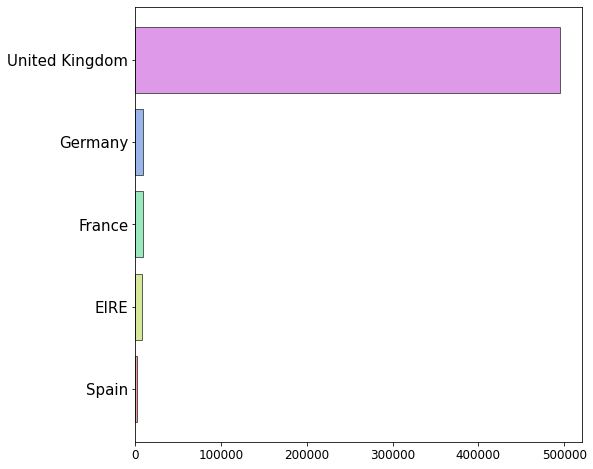

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
nation_data = Counter(df['Country']).most_common() ## Output in the order of the largest number of data
nation_data = nation_data[:5] ## Save only top 5
 
data = [x[1] for x in nation_data] ## The number of data
nations = [x[0] for x in nation_data] ## Country
 
## Change the list order to display the number of data and country at the top in the horizontal bar chart
nations.reverse()
data.reverse()
 
## Visualization
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## canvas color
colors = sns.color_palette('hls',len(data)) ## color creation
plt.yticks(fontsize=15) # Set y-axis tick label font size
plt.xticks(fontsize=12) # Set x-axis tick label font size
 
plt.barh(nations, data, color=colors,alpha=0.6,edgecolor='k') ## Create horizontal bar chart
plt.show()

In [25]:
######### data preprocessing
import pandas as pd
 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) ## Convert date from string to Timestamp format
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
## Set country and year to analyze
target_country = 'United Kingdom'
target_year = 2011
 
df = df.query('Country == @target_country and InvoiceDate.dt.year == @target_year')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [14]:
## Extract the required columns
df = df[['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']]
 
## Handling Missing Value 
df = df.dropna()
 
## Delete purchase cancellation data
 
## If there is a 'C' in front of the invoice number, it means data that has been deleted or canceled. Here, we simply need to see if there is a 'C' or not.
df = df.query('InvoiceNo.str.get(0) != "C"')

- CustomerID: Identify the Customer
- InvoiceDate: Recency
- InvoiceNo: Frequency
- Quantity and UnitPrice: Monetary

In [15]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
42481,539993,10,2011-01-04 10:00:00,1.95,13313.0
42482,539993,25,2011-01-04 10:00:00,0.42,13313.0
42483,539993,25,2011-01-04 10:00:00,0.42,13313.0
42484,539993,5,2011-01-04 10:00:00,2.10,13313.0
42485,539993,10,2011-01-04 10:00:00,1.25,13313.0
...,...,...,...,...,...
541889,581585,12,2011-12-09 12:31:00,1.95,15804.0
541890,581586,8,2011-12-09 12:49:00,2.95,13113.0
541891,581586,24,2011-12-09 12:49:00,1.25,13113.0
541892,581586,24,2011-12-09 12:49:00,8.95,13113.0


In [16]:
######### data analysis
import pandas as pd
from tqdm import tqdm
 
customer_id = list(df['CustomerID'].unique()) ## Unique customer ID
 
## First, let's find out how much each customer purchases.
monetary_df = pd.DataFrame() ## Initialization of purchase amount data
monetary_df['CustomerID'] = customer_id ## Insert customer ID
 
monetary_data = [] ## list of purchase amount
for ci in tqdm(customer_id,position=0,desc='Calculating amount of individual customer'):
    temp = df.query('CustomerID==@ci') ## Extract customer data of the corresponding ID
    amount = sum(temp['Quantity'] * temp['UnitPrice']) ## The customer's purchase amount
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data ## Insert purchase amount data
 
## Find out the most recent visit date for each customer.
temp_recency_df = df[['CustomerID','InvoiceDate']].drop_duplicates() ## Extract only customer ID and invoice date and remove duplicates
recency_df = temp_recency_df.groupby('CustomerID')['InvoiceDate'].max().reset_index() ## After grouping by ID, the most recent visit date must be obtained, so max is applied to the invoice date.
recency_df = recency_df.rename(columns={'InvoiceDate':'Recency'})
 
## Let's find out the number of visits by each customer.
temp_frequency_df = df[['CustomerID','InvoiceNo']].drop_duplicates() ## Extract only customer ID and invoice number and remove duplicates
frequency_df = temp_frequency_df.groupby('CustomerID')['InvoiceNo'].count().reset_index() ## After grouping by ID, you need to get the number of visits. In this case, the number of visits is considered as the number of invoice numbers, so count is applied to the invoice number.
frequency_df = frequency_df.rename(columns={'InvoiceNo':'Frequency'})
 
## Data must be aggregated based on customer ID.
rfm_df = pd.merge(recency_df,frequency_df,how='left',on='CustomerID')
rfm_df = pd.merge(rfm_df,monetary_df,how='left',on='CustomerID')

Calculating amount of individual customer: 100%|██████████| 3814/3814 [00:17<00:00, 213.96it/s]


In [17]:
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12747.0,2011-12-07 14:34:00,9,3489.74
2,12748.0,2011-12-09 12:20:00,175,29491.60
3,12749.0,2011-12-06 09:56:00,5,4090.88
4,12820.0,2011-12-06 15:12:00,4,942.34
...,...,...,...,...
3809,18280.0,2011-03-07 09:52:00,1,180.60
3810,18281.0,2011-06-12 10:53:00,1,80.82
3811,18282.0,2011-12-02 11:43:00,2,178.05
3812,18283.0,2011-12-06 12:02:00,16,2094.88


In [ ]:
## data transformation
current_day = pd.to_datetime('20110101') ## The reference date was set to 0:0 on January 1, 2011.
time_diff = rfm_df['Recency']-current_day ## Time difference between the last visit date and the base date
time_in_seconds = [x.total_seconds() for x in time_diff] ## Calculate time difference in seconds
rfm_df['Recency'] = time_in_seconds ## Reinsert the converted data.

In [26]:
def get_score(level, data):
    '''
    Description:
     based on the elements in the level
     A function that gives a score from 1 to len(level)+ 1
    
     Parameters:
     level = Numeric data of tuple or list type and must be sorted in ascending order.
     Example - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X
     data = data to score. Iterable data types
     return :
     Returns a list of scores
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue 
    return score
    
def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    '''
    Description:
    When data of recent visit date/number of visits/purchase amount for individual customers is given
    The most recent visit date/number of visits/purchase amount score is calculated and pasted to the right of the given data.
    
    Parameters:
    df = pandas.DataFrame data
    num_class = number of classes (scores)
    rfm_tick_point = A value that is used to classify the last visit date/number of visits/purchase amount
                    Values ​​can be set directly through 'quantile', 'min_max' or a list.
                    However, when using a list, the number of elements must be num_class - 1.
                    quatile = score based on quantiles in the data
                    min_max = score by dividing the minimum and maximum values ​​of the data equally
    rfm_col_map = column name corresponding to recent visit date/number of visits/purchase amount
    Example - {'R':'Recency','F':'Frequency','M':'Monetary'}
    suffix = suffix attached to the column name corresponding to the date of recent visit/number of visits/purchase amount
    Return :
    pandas.DataFrame
    '''
    ##### Check required modules
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
    
    ##### parameter check
    if not isinstance(df, pd.DataFrame): ## Data should be pd.DataFrame.
        print('The data must be a pandas.DataFrame object.')
        return
    
    if isinstance(rfm_tick_point, dict) == False or isinstance(rfm_col_map, dict) == False: ## Both rfm_tick_point and rfm_col_map must be dictionaries.
        print(f'Both rfm_tick_point and rfm_col_map must be dictionaries.')
        return
    
    if len(rfm_col_map) != 3: ## rfm_col_map must have 3 keys.
        print(f'rfm_col_map must have 3 keys. \nCurrently rfm_col_map contains {len(rfm_col_map)} keys.')
        return
    
    if len(rfm_tick_point) != 3: ## The rfm_tick_point argument must have 3 keys.
        print(f'The rfm_tick_point argument must have 3 keys. \nCurrently rfm_col_map contains {len(rfm_col_map)} keys.')
        return
    
    if set(rfm_tick_point.keys()) != set(rfm_col_map.keys()): ## rfm_tick_point and rfm_col_map must have the same key.
        print(f'rfm_tick_point and rfm_col_map must have the same key.')
        return
    
    if not set(rfm_col_map.values()).issubset(set(df.columns)):
        not_in_df = set(rfm_col_map.values())-set(df.columns)
        print(f'{not_in_df} must be in the data column.')
        return
    
    for k, v in rfm_tick_point.items():
        if isinstance(v, str):
            if not v in ['quantile','min_max']:
                print(f'{k} must be either "quantile" or "min_max".')
                return
        elif isinstance(v,list) or isinstance(v,tuple):
            if len(v) != num_class-1:
                print(f'The element of the list (tuple) corresponding to {k}, is {num_class-1}.')
                return
    
    if suffix:
        if not isinstance(suffix, str):
            print('The suffix argument must be a string.')
            return
        
    ##### Last visit date/number of visits/purchase amount score
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                ## data transformation
                scale = preprocessing.StandardScaler() ## A class that makes it easy to manipulate a range of data
                temp_data = np.array(df[rfm_col_map[k]]) ## Convert data to numpy array
                temp_data = temp_data.reshape((-1,1)) ## Converting a one-dimensional array to a two-dimensional one to apply a scale
                temp_data = scale.fit_transform(temp_data) ## Transform the data so that the mean is 0 and the standard deviation is 1
                temp_data = temp_data.squeeze() ## Transform data back to one dimension
 
                ## quantile vector
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1] ## Specifies the base value for which the quantile is to be obtained, except for 0 and 1
                quantiles = [] ## list of quantiles
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql)) ## Calculate quantiles and insert into list
            else: ## For min_max
                ## data transformation
                temp_data = np.array(df[rfm_col_map[k]])
 
                ## Equal Point Calculation
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1] ## 최소값과 최대값을 점수 개수만큼 등간격으로 분할하는 점
        else: ## If you directly enter a separate value
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v ## Directly insert a separate value
        score = get_score(quantiles, temp_data) ## Scores are given based on the division value and stored as a list
        new_col_name = rfm_col_map[k]+'_'+k ## The name of the variable that holds the score
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score ## Add score data next to existing data
    return df

In [27]:
get_score([55, 85],[100, 85, 70, 60, 55])

[3, 2, 2, 2, 1]

In [28]:
import numpy as np
 
data = [30, 40, 53, 55, 70, 79, 81, 83, 89, 95]
for x in np.linspace(np.min(data),np.max(data),6)[1:-1]:
    print(f'cut-off value : {x:.1f}')

cut-off value : 43.0
cut-off value : 56.0
cut-off value : 69.0
cut-off value : 82.0


In [29]:
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'}
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
 
result = get_rfm_grade(df=rfm_df, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result.to_csv('result.csv',index=False)

In [30]:
result[['CustomerID','Recency_R','Frequency_F','Monetary_M']]

,CustomerID,Recency_R,Frequency_F,Monetary_M
0,12346.0,1,1,5
1,12747.0,5,5,5
2,12748.0,5,5,5
3,12749.0,5,4,5
4,12820.0,5,4,4
...,...,...,...,...
3809,18280.0,1,1,1
3810,18281.0,1,1,1
3811,18282.0,5,2,1
3812,18283.0,5,5,5


# How to use min and max values

In [31]:
rfm_tick_point={'R':'quantile','F':'quantile','M':'min_max'} ## Apply the method using the minimum value and maximum value to the purchase amount
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
 
result = get_rfm_grade(df=rfm_df, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result[['CustomerID','Recency_R','Frequency_F','Monetary_M']]

,CustomerID,Recency_R,Frequency_F,Monetary_M
0,12346.0,1,1,2
1,12747.0,5,5,1
2,12748.0,5,5,1
3,12749.0,5,4,1
4,12820.0,5,4,1
...,...,...,...,...
3809,18280.0,1,1,1
3810,18281.0,1,1,1
3811,18282.0,5,2,1
3812,18283.0,5,5,1


# How to set your own reference value

In [33]:
rfm_tick_point={'R':'quantile','F':[5, 10, 50, 90],'M':'quantile'} ## Apply the method of setting the standard value directly on the number of visits
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
 
result = get_rfm_grade(df=rfm_df, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result[['CustomerID','Recency_R','Frequency_F','Monetary_M']]

,CustomerID,Recency_R,Frequency_F,Monetary_M
0,12346.0,1,1,5
1,12747.0,5,2,5
2,12748.0,5,5,5
3,12749.0,5,1,5
4,12820.0,5,1,4
...,...,...,...,...
3809,18280.0,1,1,1
3810,18281.0,1,1,1
3811,18282.0,5,1,1
3812,18283.0,5,3,5


# RFM weight calculation

In [34]:
import pandas as pd
rfm_score = pd.read_csv('result.csv')

In [35]:
rfm_score.head(10)

,CustomerID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M
0,12346.0,2011-01-18 10:01:00,1,77183.60,1,1,5
1,12747.0,2011-12-07 14:34:00,9,3489.74,5,5,5
2,12748.0,2011-12-09 12:20:00,175,29491.60,5,5,5
3,12749.0,2011-12-06 09:56:00,5,4090.88,5,4,5
4,12820.0,2011-12-06 15:12:00,4,942.34,5,4,4
5,12821.0,2011-05-09 15:51:00,1,92.72,1,1,1
6,12822.0,2011-09-30 10:04:00,2,948.88,2,2,4
7,12823.0,2011-09-26 07:35:00,5,1759.50,2,4,4
8,12824.0,2011-10-11 12:49:00,1,397.12,3,1,2
9,12826.0,2011-12-07 10:25:00,6,1319.72,5,5,4


In [36]:
import pandas as pd
import numpy as np
 
from tqdm import tqdm

In [37]:
def get_score(level, data, reverse = False):
    '''
    Description:
     based on the elements in the level
     A function that gives a score from 1 to len(level)+ 1
    
     Parameters:
     level = Numeric data of tuple or list type and must be sorted in ascending order.
     Example - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X
     data = data to score. Iterable data types
     reverse = True when you want to set the corresponding value low when the score is high
     return :
     Returns a list of scores
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 
 
grid_number = 100 ## The number of scales, if set too large, memory problems may occur.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## number of classes
class_level = np.linspace(1,5,num_class+1)[1:-1] ## Decide where the class splits
total_amount_of_sales = rfm_score['Monetary'].sum() ## Total purchase amount = total sales

In [38]:
max_std = 0 ## standard deviation initial value
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## Calculation of score for each customer based on a given weight
    score = w[0]*rfm_score['Recency_R'] + \
                        w[1]*rfm_score['Frequency_F'] + \
                        w[2]*rfm_score['Monetary_M'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## Rating by customer using score
    ## The purchase amount is aggregated by grade
    grouped_rfm_score = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
        
    ## Calculate the contribution to sales by class by dividing the purchase amount by class by the total purchase amount
    grouped_rfm_score['Monetary'] = grouped_rfm_score['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['Monetary'].std() ## Calculate standard deviation of contribution to sales
    if max_std <= std_sales:
        max_std = std_sales ## Update the maximum standard deviation
        optimal_weights = w  ## Update weight

[Finding Optimal weights]: 100%|██████████| 5151/5151 [05:27<00:00, 15.73it/s]


In [39]:
print(optimal_weights)

(0.0, 0.26, 0.74)


In [40]:
score = optimal_weights[0]*rfm_score['Recency_R'] + \
        optimal_weights[1]*rfm_score['Frequency_F'] + \
        optimal_weights[2]*rfm_score['Monetary_M'] ## Score by customer
 
rfm_score['Class'] = get_score(class_level,score,True) ## Rating by customer

In [41]:
## Count the number of customers by class
temp_rfm_score1 = rfm_score.groupby('Class')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Count'})
 
## Calculation of purchase amount (sales) by class
temp_rfm_score2 = rfm_score.groupby('Class')['Monetary'].sum().reset_index()
 
## Calculation of contribution to sales by class
temp_rfm_score2['Monetary'] = temp_rfm_score2['Monetary'].map(lambda x : x/total_amount_of_sales)
 
## Data aggregation
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))
result_df

,Class,Count,Monetary
0,1,901,0.744452
1,2,587,0.121736
2,3,618,0.063758
3,4,483,0.031131
4,5,1225,0.038923


In [42]:
max_std = 0 ## standard deviation initial value
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## Calculation of score for each customer based on a given weight
    score = w[0]*rfm_score['Recency_R'] + \
                        w[1]*rfm_score['Frequency_F'] + \
                        w[2]*rfm_score['Monetary_M'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## Rating by customer using score
    ## The purchase amount is aggregated by grade
    grouped_rfm_score = rfm_score.groupby('Class')['Monetary'].sum().reset_index()

    ## Add Constraint - Higher tier customers must have greater sales than lower tier customers
    grouped_rfm_score = grouped_rfm_score.sort_values('Class')

    temp_monetary = list(grouped_rfm_score['Monetary'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
        
    ## Calculate the contribution to sales by class by dividing the purchase amount by class by the total purchase amount
    grouped_rfm_score['Monetary'] = grouped_rfm_score['Monetary'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['Monetary'].std() ## Calculate standard deviation of contribution to sales
    if max_std <= std_sales:
        max_std = std_sales ## Update the maximum standard deviation
        optimal_weights = w  ## Update weight

[Finding Optimal weights]: 100%|██████████| 5151/5151 [04:49<00:00, 17.80it/s]


In [43]:
print(optimal_weights)

(0.02, 0.23, 0.75)


In [44]:
result_df

,Class,Count,Monetary
0,1,901,0.744452
1,2,587,0.121736
2,3,618,0.063758
3,4,483,0.031131
4,5,1225,0.038923
